https://medium.com/@vgnshiyer/link-prediction-in-a-social-network-df230c3d85e6 This notebook is inspired in the previous link

In [5]:
import networkx as nx
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f = open("training.txt", "r")
G = nx.DiGraph()
for line in f:
    line = line.split()
    G.add_node(line[0])
    G.add_node(line[1])
    if line[2] == '1':
        G.add_edge(line[0], line[1])

In [4]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 33226
Number of edges: 283623
Average in degree:   8.5362
Average out degree:   8.5362


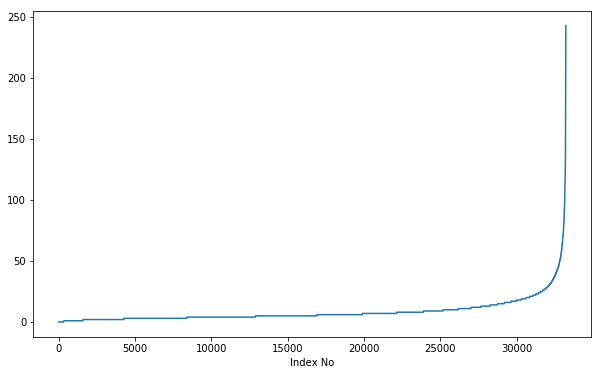

In [6]:
indegree_dist = list(dict(G.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
#plt.ylabel('No Of Followers')
plt.show()

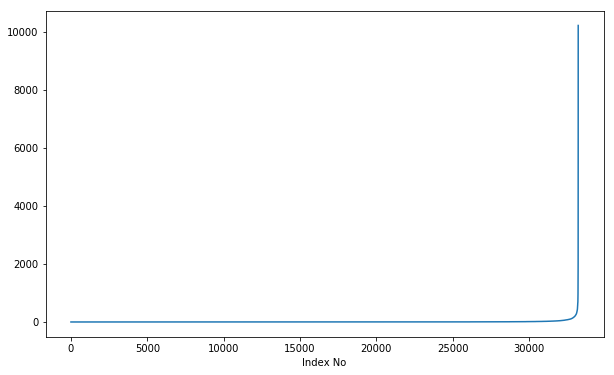

In [8]:
outdegree_dist = list(dict(G.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
#plt.ylabel('No Of Followee')
plt.show()

In [9]:
aa = []
f = open("testing.txt", "r")
df_train = pd.read_csv("training.txt", sep=" ", header=None)

for line in f:
    line = line.split()
    for u, v, p in nx.adamic_adar_index(G, [(line[0], line[1])]):
        aa.append(p)
df_train["Adamic-Adar"] = aa

NetworkXNotImplemented: not implemented for directed type